# Data Preprocessing

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


train_df = pd.read_csv('../data/train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22501 entries, 0 to 22500
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sentence_id  22501 non-null  int64 
 1   Text         22501 non-null  object
 2   Verdict      22501 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 527.5+ KB


In [18]:
# remove duplicates and null values
train_df.drop_duplicates(inplace=True)
train_df.dropna(inplace=True)

In [17]:
print("\nClass distribution:")
train_df['Verdict'].value_counts()


Class distribution:


Verdict
-1    14685
 1     5413
 0     2403
Name: count, dtype: int64

In [4]:
train_df.head()

,Sentence_id,Text,Verdict
0,1,I think we've seen a deterioration of values.,-1
1,2,I think for a while as a nation we condoned th...,-1
2,3,"For a while, as I recall, it even seems to me ...",-1
3,4,"So we've seen a deterioration in values, and o...",-1
4,5,"We got away, we got into this feeling that val...",-1


# tokenization

In [5]:
import spacy

# Load the English model
nlp = spacy.load("en_core_web_sm")

# Example text
text = "Hello there! How are you doing today?"

# Process the text with spaCy
doc = nlp(text)

# Tokenize and print words
tokens = [token.text for token in doc]
print(tokens)

['Hello', 'there', '!', 'How', 'are', 'you', 'doing', 'today', '?']


In [9]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm", disable=["ner"])

# Apply nlp.pipe to the 'Text' column
# Disable certain pipeline components to improve performance
docs = list(nlp.pipe(train_df["Text"]))

In [12]:
train_df["tokens"] = [[token.text for token in doc] for doc in docs]
train_df["lemmas"] = [[token.lemma_ for token in doc] for doc in docs]
train_df["pos_tags"] = [[token.pos_ for token in doc] for doc in docs]
train_df["tagged_words"] = [[(token.text, token.tag_, token.pos_) for token in doc] for doc in docs]

train_df.head()

,Sentence_id,Text,Verdict,tokens,lemmas,tag,pos_tags,tagged_words
0,1,I think we've seen a deterioration of values.,-1,"[I, think, we, 've, seen, a, deterioration, of...","[I, think, we, have, see, a, deterioration, of...","[(I, PRP, PRON), (think, VBP, VERB), (we, PRP,...","[PRON, VERB, PRON, AUX, VERB, DET, NOUN, ADP, ...","[(I, PRP, PRON), (think, VBP, VERB), (we, PRP,..."
1,2,I think for a while as a nation we condoned th...,-1,"[I, think, for, a, while, as, a, nation, we, c...","[I, think, for, a, while, as, a, nation, we, c...","[(I, PRP, PRON), (think, VBP, VERB), (for, IN,...","[PRON, VERB, ADP, DET, NOUN, ADP, DET, NOUN, P...","[(I, PRP, PRON), (think, VBP, VERB), (for, IN,..."
2,3,"For a while, as I recall, it even seems to me ...",-1,"[For, a, while, ,, as, I, recall, ,, it, even,...","[for, a, while, ,, as, I, recall, ,, it, even,...","[(For, IN, ADP), (a, DT, DET), (while, NN, NOU...","[ADP, DET, NOUN, PUNCT, SCONJ, PRON, VERB, PUN...","[(For, IN, ADP), (a, DT, DET), (while, NN, NOU..."
3,4,"So we've seen a deterioration in values, and o...",-1,"[So, we, 've, seen, a, deterioration, in, valu...","[so, we, have, see, a, deterioration, in, valu...","[(So, RB, ADV), (we, PRP, PRON), ('ve, VBP, AU...","[ADV, PRON, AUX, VERB, DET, NOUN, ADP, NOUN, P...","[(So, RB, ADV), (we, PRP, PRON), ('ve, VBP, AU..."
4,5,"We got away, we got into this feeling that val...",-1,"[We, got, away, ,, we, got, into, this, feelin...","[we, get, away, ,, we, get, into, this, feelin...","[(We, PRP, PRON), (got, VBD, VERB), (away, RP,...","[PRON, VERB, ADP, PUNCT, PRON, VERB, ADP, DET,...","[(We, PRP, PRON), (got, VBD, VERB), (away, RP,..."


In [13]:
train_df.drop(columns=["tag"], inplace=True)

In [14]:
train_df.to_csv('../data/process_train.csv', index=False)

# entities per class

In [23]:
from collections import Counter
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

entity_counts_per_class = {}

# Process texts and extract entity counts
for text, label in zip(train_df["Text"], train_df["Verdict"]):
    doc = nlp(text)
    entity_types = [ent.label_ for ent in doc.ents]  # Extract entity types
    
    if label not in entity_counts_per_class:
        entity_counts_per_class[label] = Counter()  # Initialize counter for label
    
    entity_counts_per_class[label].update(entity_types)  # Update counts

# Convert to DataFrame for better visualization
entity_counts_df = pd.DataFrame(entity_counts_per_class).fillna(0).astype(int)

# Print entity counts per class
print(entity_counts_df)

               -1    0     1
PERSON       1374  617  1179
NORP         1118  216   673
GPE          1982  542  1404
FAC            37    9    31
ORG          1111  376  1224
DATE          928  432  1339
CARDINAL      818  249  1263
ORDINAL       394   92   268
TIME          217   67    34
LOC           238   49   153
MONEY         161   25   754
WORK_OF_ART    20   17    21
LAW           100   13    48
PERCENT        62    5   457
PRODUCT        17    7    29
EVENT          50   26    45
LANGUAGE        2    3     7
QUANTITY       10    4    42


In [27]:
total_entities_per_class = entity_counts_df.sum(axis=0)

# Normalize counts by dividing by total entities per class
normalized_df = entity_counts_df.div(total_entities_per_class, axis=1).fillna(0)

# Convert to percentages (optional)
normalized_df_percentage = normalized_df * 100

# Print normalized counts as percentages
print("Normalized Entity Counts (Percentage per Class):")
print(normalized_df_percentage)

Normalized Entity Counts (Percentage per Class):
                    -1          0          1
PERSON       15.904619  22.444525  13.142348
NORP         12.941313   7.857403   7.501951
GPE          22.942470  19.716260  15.650429
FAC           0.428290   0.327392   0.345558
ORG          12.860285  13.677701  13.643964
DATE         10.741984  15.714805  14.925872
CARDINAL      9.468689   9.057839  14.078698
ORDINAL       4.560713   3.346672   2.987404
TIME          2.511865   2.437250   0.378999
LOC           2.754948   1.782466   1.705495
MONEY         1.863642   0.909422   8.404860
WORK_OF_ART   0.231508   0.618407   0.234088
LAW           1.157541   0.472899   0.535057
PERCENT       0.717676   0.181884   5.094192
PRODUCT       0.196782   0.254638   0.323264
EVENT         0.578771   0.945798   0.501616
LANGUAGE      0.023151   0.109131   0.078029
QUANTITY      0.115754   0.145507   0.468175


In [28]:


# Find the class with the maximum count for each entity
entity_counts_df["Most_Common_Class"] = entity_counts_df.idxmax(axis=1)

# Print results
print("Entity Counts per Class with Most Common Class:")
print(entity_counts_df)

Entity Counts per Class with Most Common Class:
               -1    0     1  Most_Common_Class
PERSON       1374  617  1179                 -1
NORP         1118  216   673                 -1
GPE          1982  542  1404                 -1
FAC            37    9    31                 -1
ORG          1111  376  1224                  1
DATE          928  432  1339                  1
CARDINAL      818  249  1263                  1
ORDINAL       394   92   268                 -1
TIME          217   67    34                 -1
LOC           238   49   153                 -1
MONEY         161   25   754                  1
WORK_OF_ART    20   17    21                  1
LAW           100   13    48                 -1
PERCENT        62    5   457                  1
PRODUCT        17    7    29                  1
EVENT          50   26    45                 -1
LANGUAGE        2    3     7                  1
QUANTITY       10    4    42                  1


# word cloud

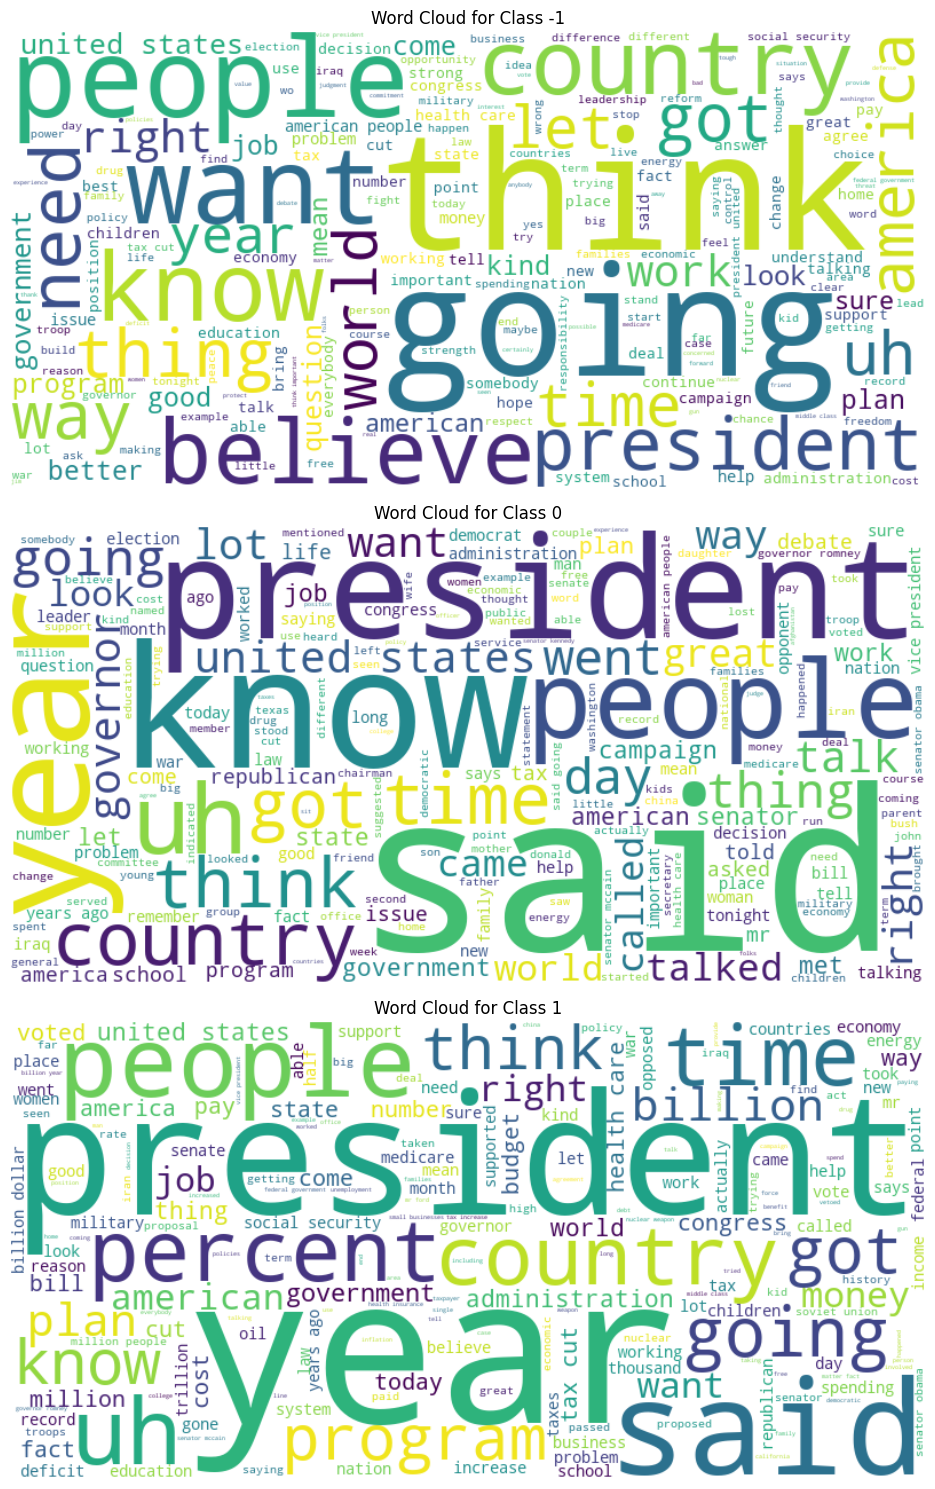

In [20]:
from collections import defaultdict
from wordcloud import WordCloud

def clean_text_spacy(text):
    doc = nlp(text.lower())  # Process text with SpaCy and convert to lowercase
    # Tokenize and remove stopwords and punctuation using SpaCy
    return " ".join([token.text for token in doc if not token.is_stop and not token.is_punct])


train_df['cleaned_sentence'] = train_df['Text'].apply(clean_text_spacy)

# Group sentences by label
text_by_label = defaultdict(str)
for label, sentence in zip(train_df['Verdict'], train_df['cleaned_sentence']):
    text_by_label[label] += " " + sentence

# Plot word clouds
plt.figure(figsize=(10, 5 * len(text_by_label)))
for i, (label, text) in enumerate(text_by_label.items()):
    plt.subplot(len(text_by_label), 1, i + 1)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Class {label}")

plt.tight_layout()
plt.show()

they all look like they are in similar domain, so we cannot just rely on words alone to differentiate classes